In [475]:
import numpy
import copy
import time
import random
import matplotlib.pyplot as plt

In [476]:
 D_graphe={'s':0,
          'a':1,
          'b':2,
          'c':3,
          'd':4,
          'e':5,
          'f':6,
          'g':7,
          'h':8,
          'i':9,
          'j':10,
          'k':11,
          'l':12,
          'm':13,
          't':14}

In [477]:
D={0:[[1,1],[2,7],[3,2],[4,5],[5,10]],
   1:[[6,1],[7,2]],
   2:[[7,3],[8,5]],
   3:[[8,42],[9,17]],
   4:[[9,21],[10,2]],
   5:[[10,27]],
   6:[[11,2]],
   7:[[11,1]],
   8:[[12,2]],
   9:[[12,1]],
   10:[[13,2]],
   11:[[14,4]],
   12:[[14,2],[11,21]],
   13:[[12,21],[14,1]],
   14:[]
   }

In [478]:
exemple={  0: [[1,100],[2,100]]             ,
     1: [[2,1],[3,100]]               ,
     2: [[1,1],[3,100]]               ,
     3: []
    }

In [479]:
def construire_graphe(D):
    Liste_arretes=[]
    for x in D:
            for i in range(len(D[x])):
                    Liste_arretes.append([x,D[x][i][0],D[x][i][1]])
    g=DiGraph()
    g.add_edges(Liste_arretes)
    return g

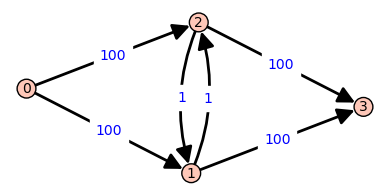

In [480]:
g=construire_graphe(exemple)
g.graphplot(edge_labels=True).show()

In [481]:
def BFS(D,s):
    l=[]
    p=[]
    c=[]
    for v in range(len(D)):
        l.append(9999)
        p.append(None)
        c.append(0)
    l[s]=0
    L=[]
    L.append(s)
    while (len(L)>0):
        v=L[0]
        L.remove(v)
        for k in D[v]:
                j=k[0]
                if c[j]==0:
                    L.append(j)
                    c[j]=1
                    p[j]=v
                    l[j]=l[v]+1
        c[v]=2
    D_BFS={}
    for i in range(len(p)):
        D_BFS[i]=[]
    for i in range(len(p)):
        if p[i]!=None:
            for v in D[p[i]]:
                if v[0]==i:
                    D_BFS[p[i]].append([i,D[p[i]][D[p[i]].index(v)][1]])
    return (p,D_BFS)

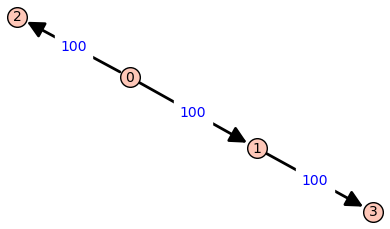

In [482]:
BFS(exemple,0)
g_bfs=construire_graphe(BFS(exemple,0)[1])
g_bfs.show(edge_labels=True)

In [483]:
g_bfs=construire_graphe(BFS(exemple,0)[1])

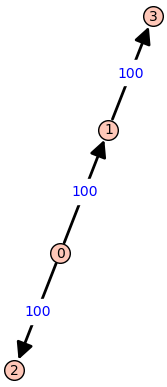

In [484]:
g_bfs.show(edge_labels=True)

In [485]:
p=BFS(exemple,0)[0]
L0=[]
def chemin(D,p,s,t,L0):
    if p[t]!=None:
            chemin(D,p,s,p[t],L0)
            L0.append([p[t],t])
    return L0

In [486]:
chemin(exemple,p,0,3,L0)

[[0, 1], [1, 3]]

In [487]:
def initialiser_flot(D):
    D1= copy.deepcopy(D)
    for x in D1:
        for l in D1[x]:
            l[1]=[0,l[1]]
    return D1

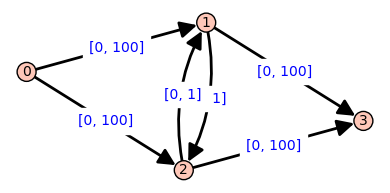

{0: [[1, [0, 100]], [2, [0, 100]]],
 1: [[2, [0, 1]], [3, [0, 100]]],
 2: [[1, [0, 1]], [3, [0, 100]]],
 3: []}

In [488]:
D2=initialiser_flot(exemple)
g2=construire_graphe(D2)
g2.show(edge_labels=True)
D2


In [489]:
D1={0:[[1,1],[2,7],[3,2],[4,5],[5,10]],
   1:[[6,1],[7,2]],
   2:[[7,3],[8,5]],
   3:[[8,42],[9,17]],
   4:[[9,21],[10,2]],
   5:[[10,27]],
   6:[[11,2]],
   7:[[11,1]],
   8:[[12,2]],
   9:[[12,1]],
   10:[[13,2]],
   11:[[14,4]],
   12:[[14,2],[11,21]],
   13:[[12,21],[14,1]],
   14:[]
   }

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [490]:
def graphe_residuel(D_flot):
    D_graphe_residuel={}
    flot=True
    #verification de contrainte de capacite
    for x in D_flot:
        for l in D_flot[x]:
            if l[1][0]>l[1][1]:
                flot=False
                print(f'le flot sur larrete {(x,l[0])} est plus grand que sa capacite')
    if flot:
        for x in D_flot:
            D_graphe_residuel[x]=[]
        for x in D_flot:
            for l in D_flot[x]:
                reste=l[1][1]-l[1][0]
                if l[1][0]!=0:
                    D_graphe_residuel[l[0]].append([x,l[1][0]])
                if reste >0:
                    D_graphe_residuel[x].append([l[0],reste])
    
    return D_graphe_residuel

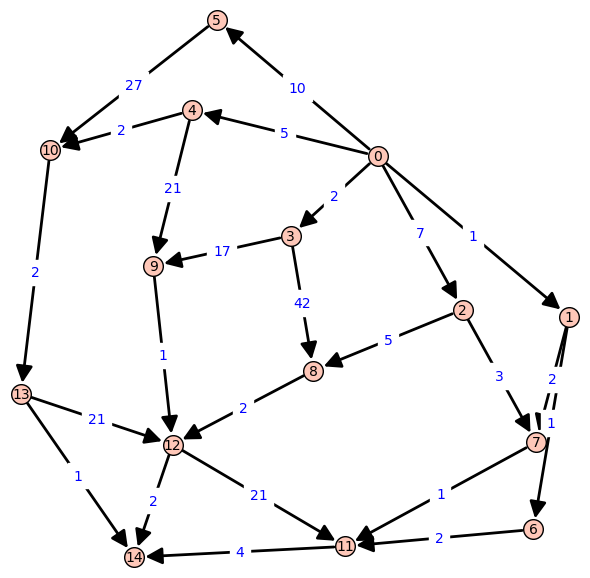

In [559]:
g4=construire_graphe(D1)
g4.show(figsize=[6,20],edge_labels=True)

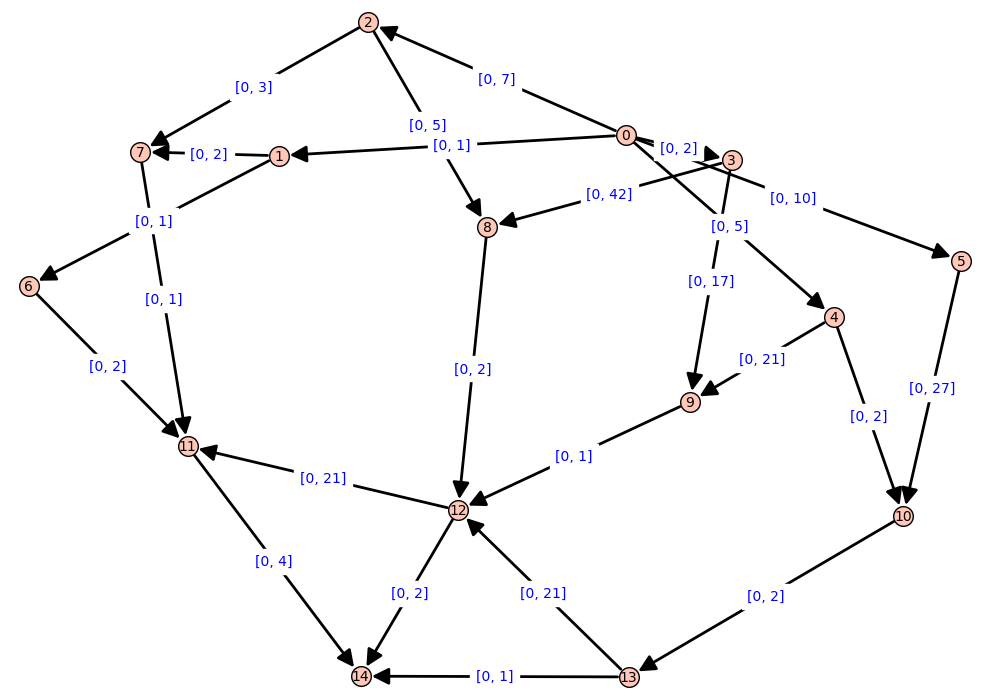

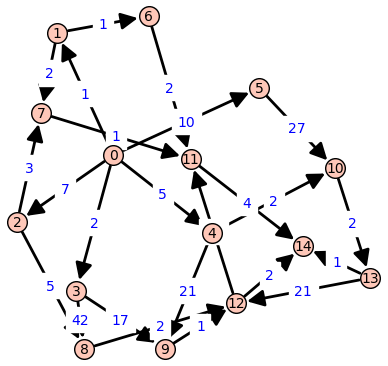

In [574]:
D_flot=initialiser_flot(D1)
g4=construire_graphe(D_flot)
g4.show(figsize=[10,9],edge_labels=True)
D3=graphe_residuel(D_flot)
g6=construire_graphe(D3)
g6.show(edge_labels=True)

{0: [[1, 100], [2, 100]], 1: [[2, 1], [3, 100]], 2: [[1, 1], [3, 100]], 3: []}


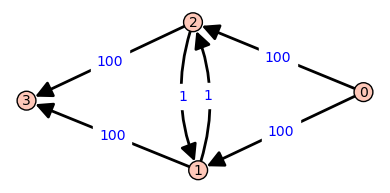

In [492]:
print(graphe_residuel(D_flot))
g=construire_graphe(graphe_residuel(D_flot))
g.show(edge_labels=True)

In [534]:
D_bfs=BFS(D3,0)[1]
print(D_bfs)

{0: [[1, 1], [2, 7], [3, 2], [4, 5], [5, 10]], 1: [[6, 1], [7, 2]], 2: [[8, 5]], 3: [[9, 17]], 4: [[10, 2]], 5: [], 6: [[11, 2]], 7: [], 8: [[12, 2]], 9: [], 10: [[13, 2]], 11: [[14, 4]], 12: [], 13: [], 14: []}


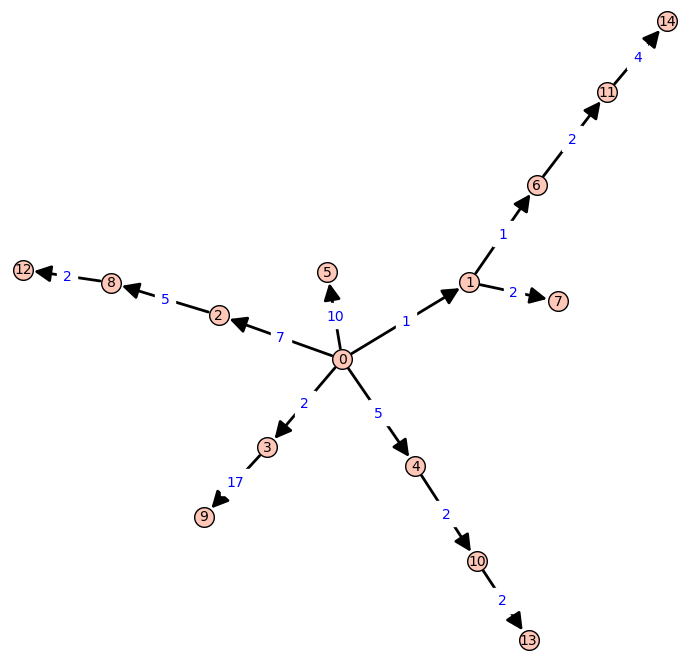

In [546]:
g_bfs=construire_graphe(D_bfs)
g_bfs.show(figsize=[7,8],edge_labels=True)

In [575]:
def Edmond_karp(D,s,t): #version qui cree et affiche tout les graphs utilise pour les calculs
    g=construire_graphe(D)
    g.show(figsize=[7,8],edge_labels=True)
    
    
    D_flot=initialiser_flot(D)
    g=construire_graphe(D_flot)
    g.show(figsize=[6,20],edge_labels=True)
    
    D_gf=graphe_residuel(D_flot)
    g=construire_graphe(D_gf)
    g.show(figsize=[6,20],edge_labels=True)
    
    p=BFS(D_gf,s)[0]
    D_gf_bfs=BFS(D_gf,s)[1]
    g_bfs=construire_graphe(D_gf_bfs)
    g_bfs.show(figsize=[7,8],edge_labels=True)
    
    
    L_chemin=[]
    chemin(D_gf_bfs,p,s,t,L_chemin)
    nb_iteration=0
    while(len(L_chemin)!=0):
        L=[]
        for x in L_chemin:
            for v in D_gf_bfs[x[0]]: 
                if v[0]==x[1]:
                    L.append(v[1])
                if(len(L)!=0):
                    min_capacite=min(L)
        for x in L_chemin:
            for v in D_flot[x[0]]:
                if v[0]==x[1]:
                     v[1][0]=v[1][0]+min_capacite
        graphe_flot=construire_graphe(D_flot)
        graphe_flot.show(figsize=[10,9],edge_labels=True)
        D_gf=graphe_residuel(D_flot)
        g=construire_graphe(D_gf)
        g.show(figsize=[6,20],edge_labels=True)
        p=BFS(D_gf,s)[0]
        D_gf_bfs=BFS(D_gf,s)[1]
        g2=construire_graphe(D_gf_bfs)
        g2.show(figsize=[7,8],edge_labels=True)
        L_chemin=[]
        chemin(D_gf_bfs,p,s,t,L_chemin)
        if len(L_chemin)==0:
            print(f"il n'existe aucun chemin de {s} a {t}")
        nb_iteration=nb_iteration+1
    g_final=construire_graphe(D_flot)
    g_final.show(figsize=[6,20],edge_labels=True)
    print(f'nombre iterations= {nb_iteration}')
    flot_max=0
    for x in D_flot[s]:
        flot_max=flot_max+x[1][0]
    print(f'la valeur du flot est {flot_max}')
    return (L,D_flot,flot_max)

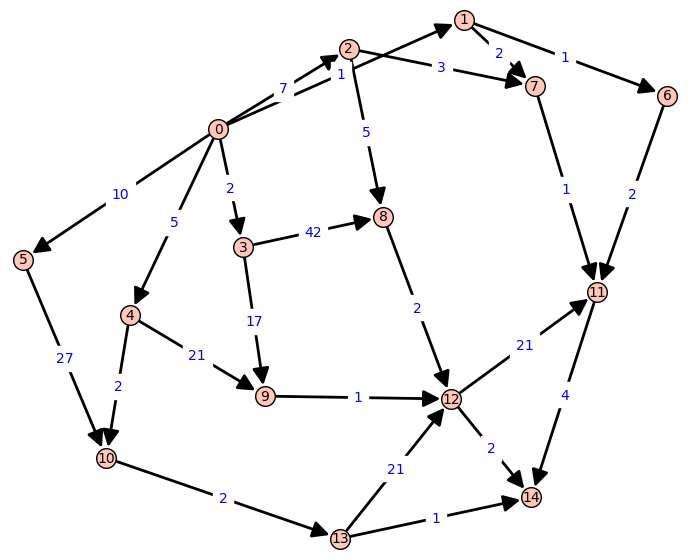

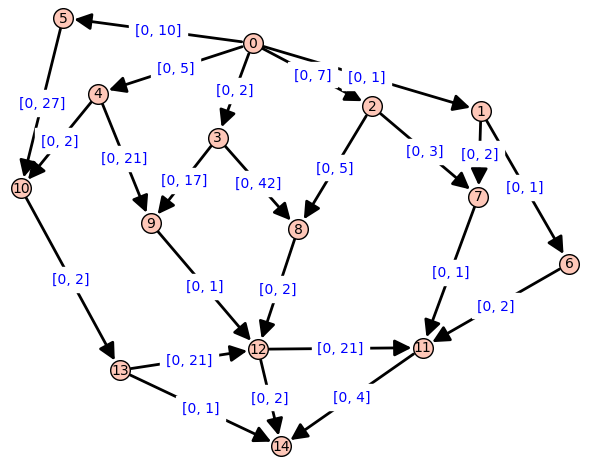

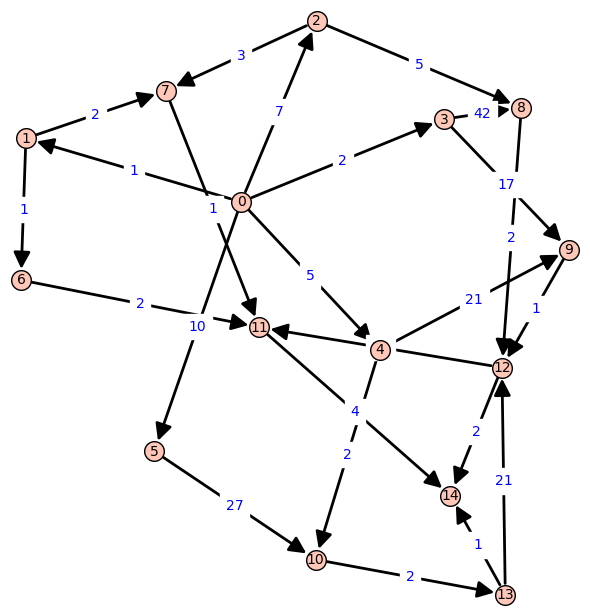

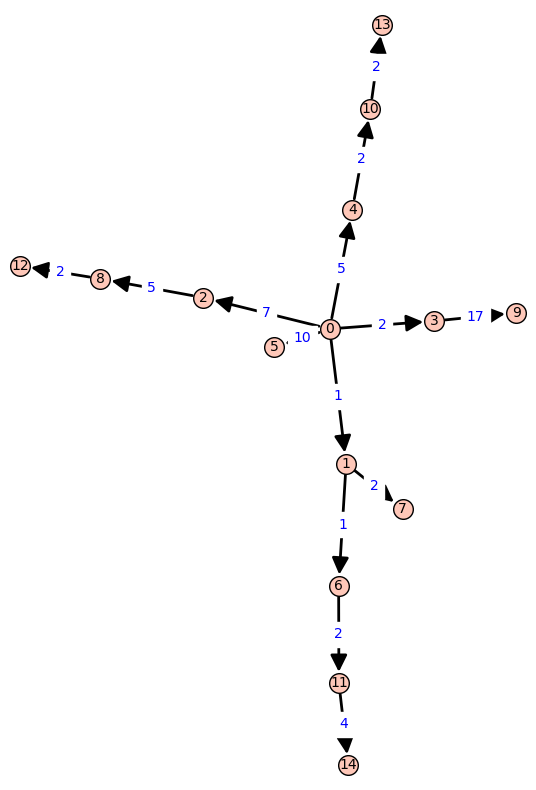

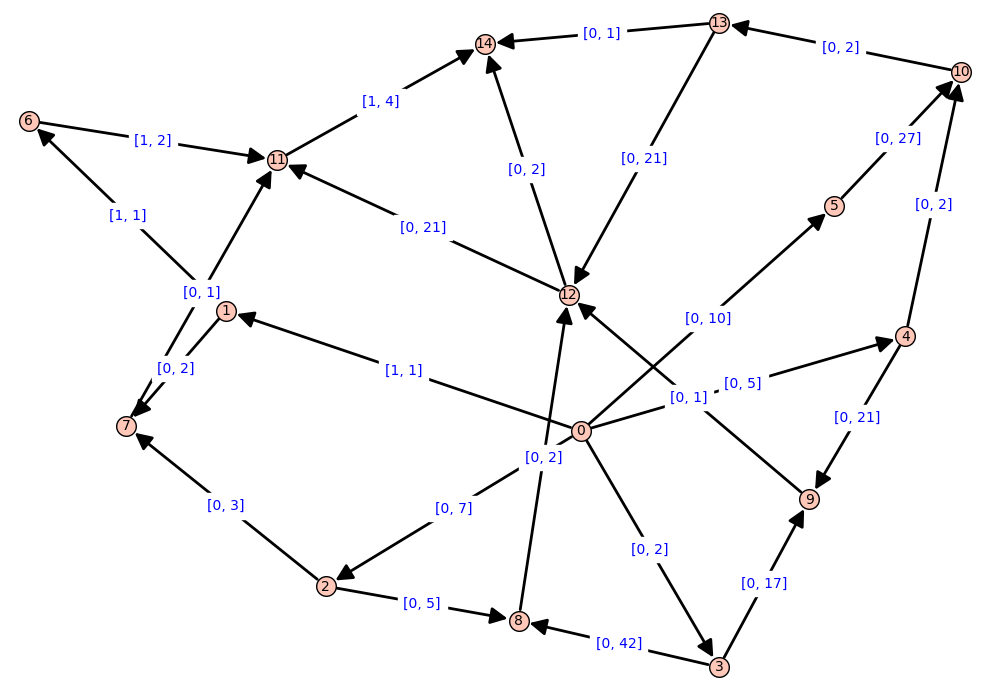

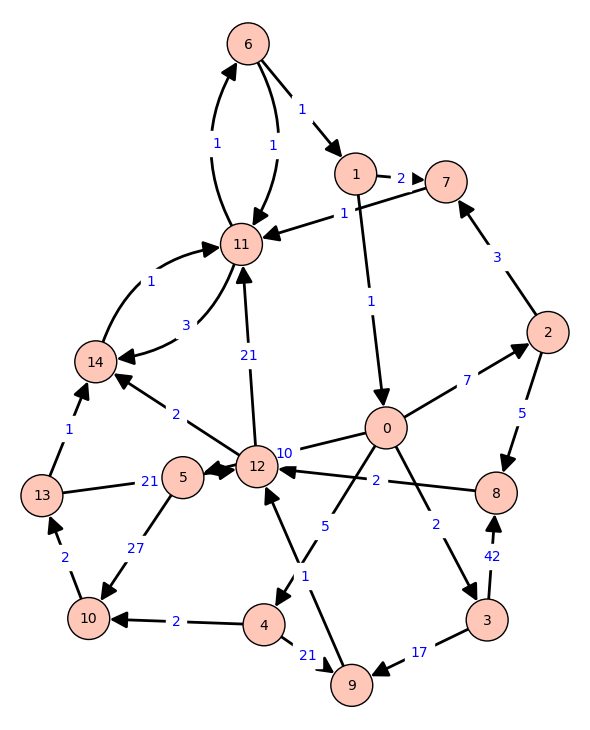

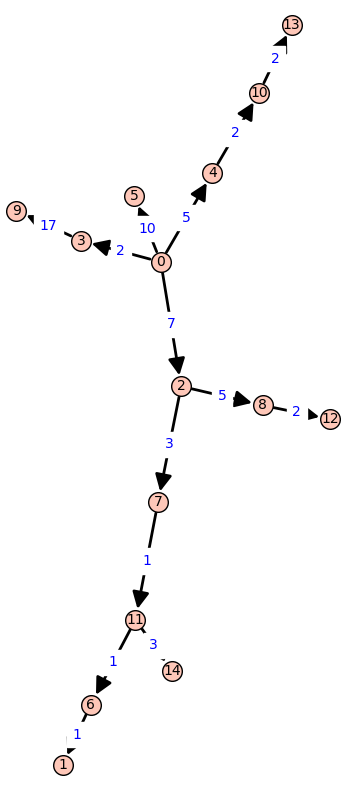

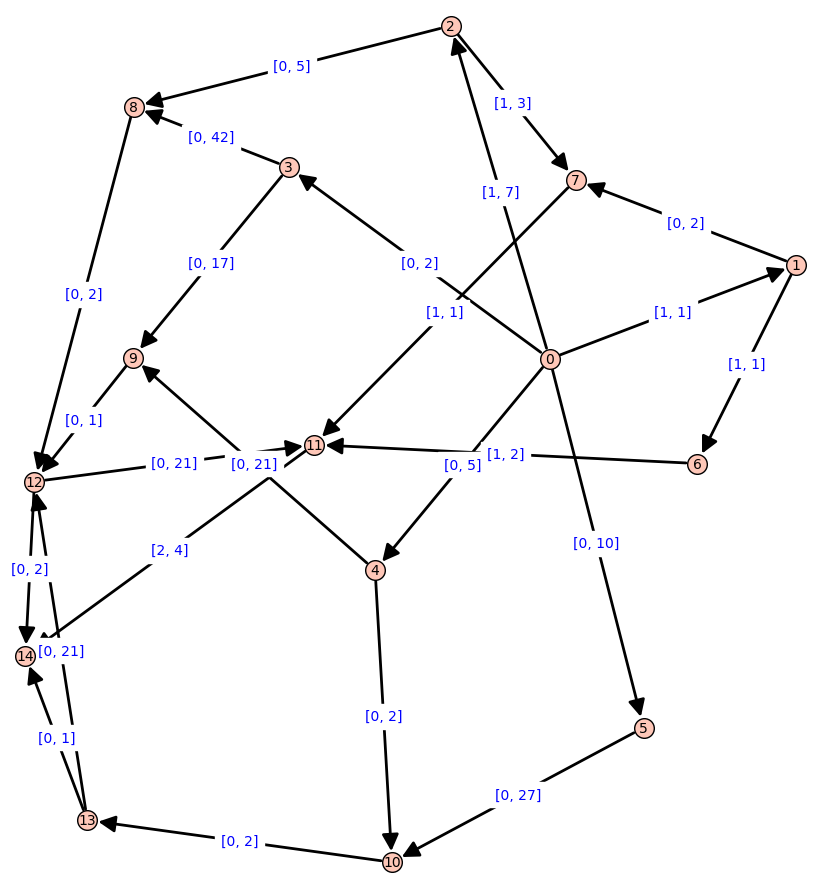

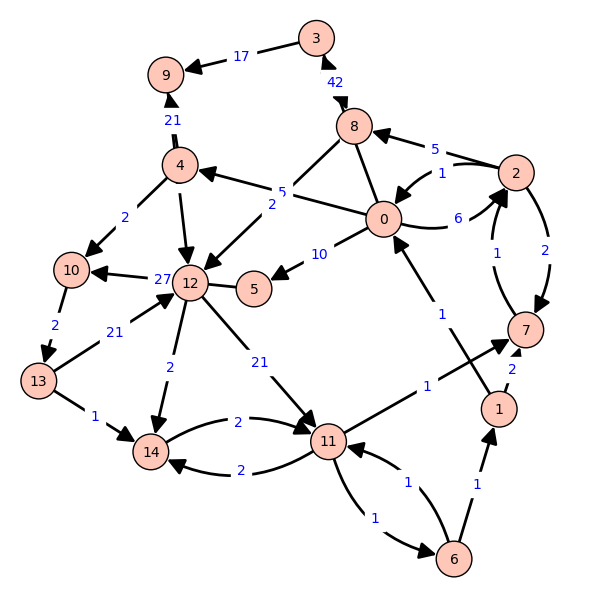

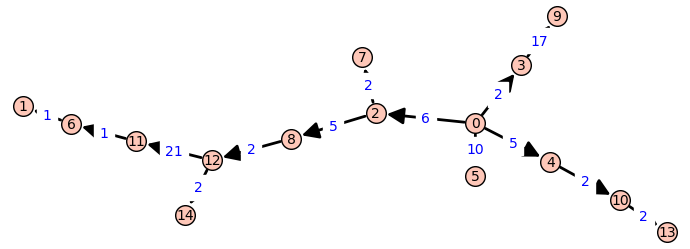

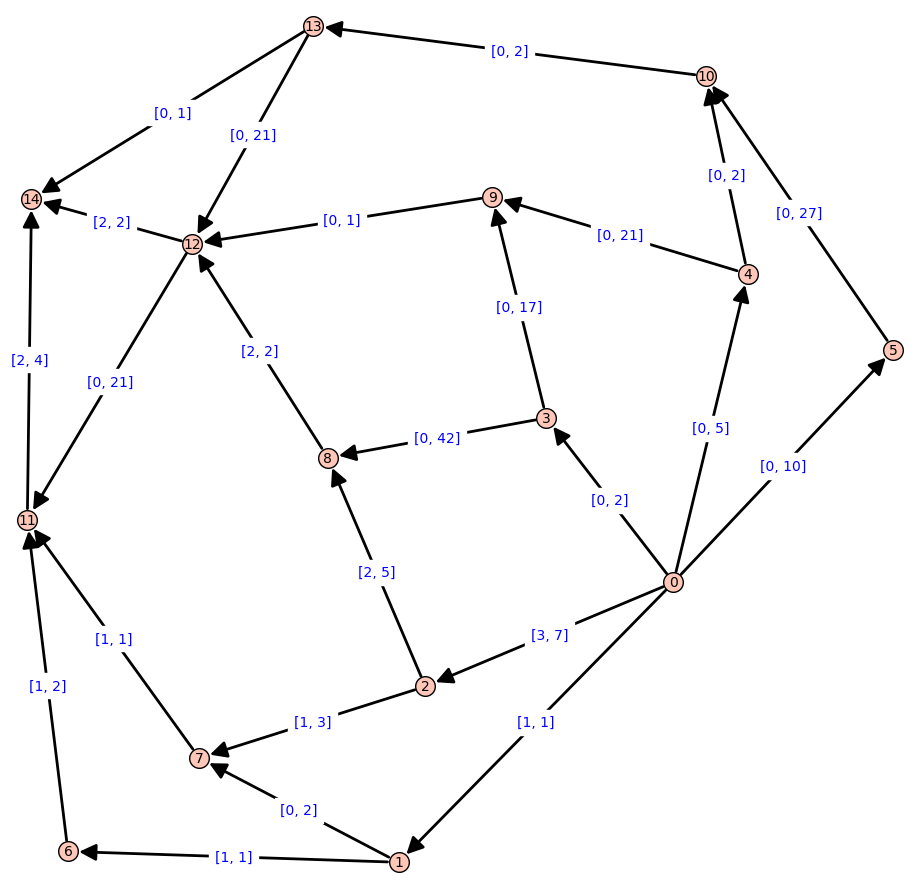

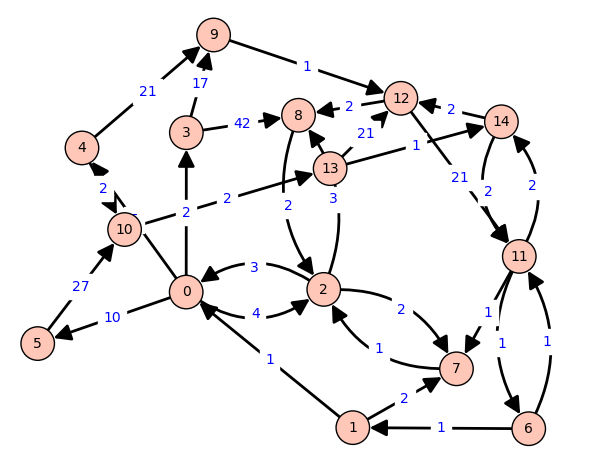

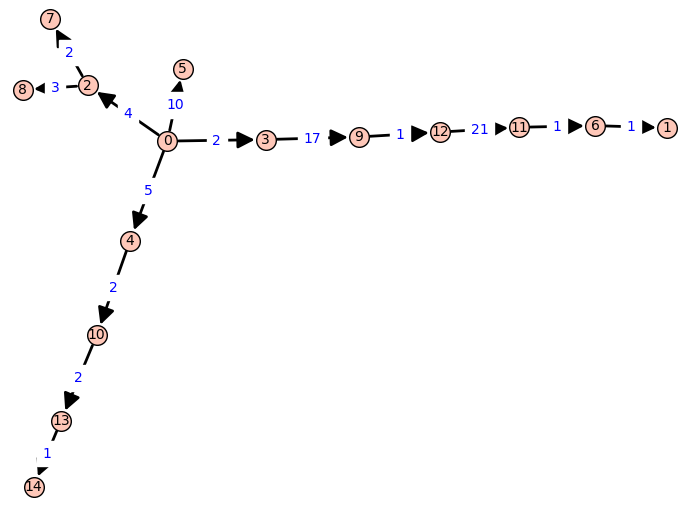

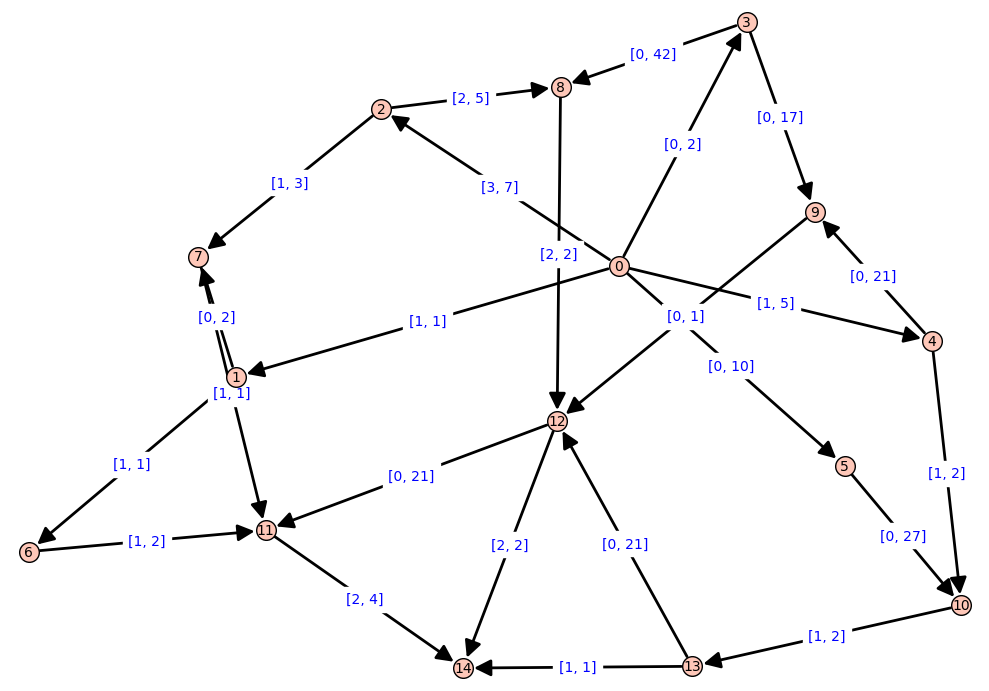

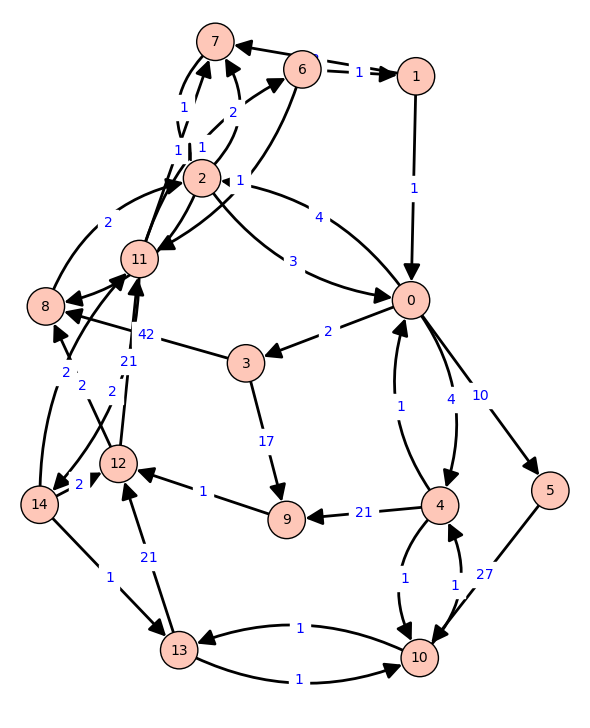

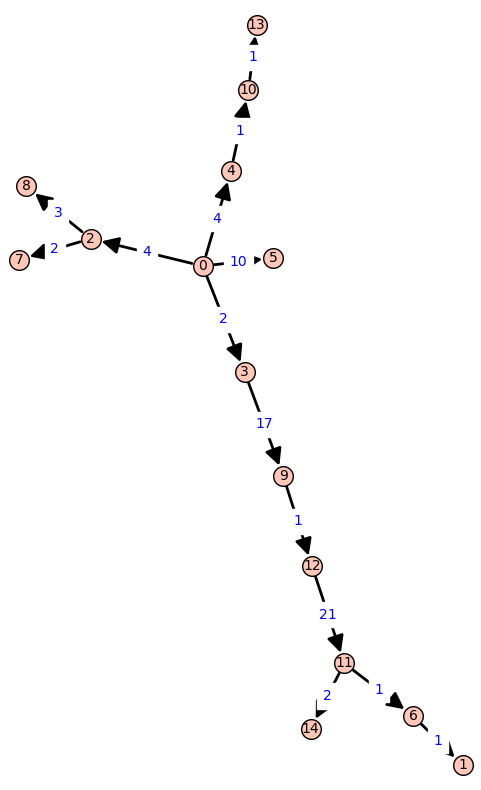

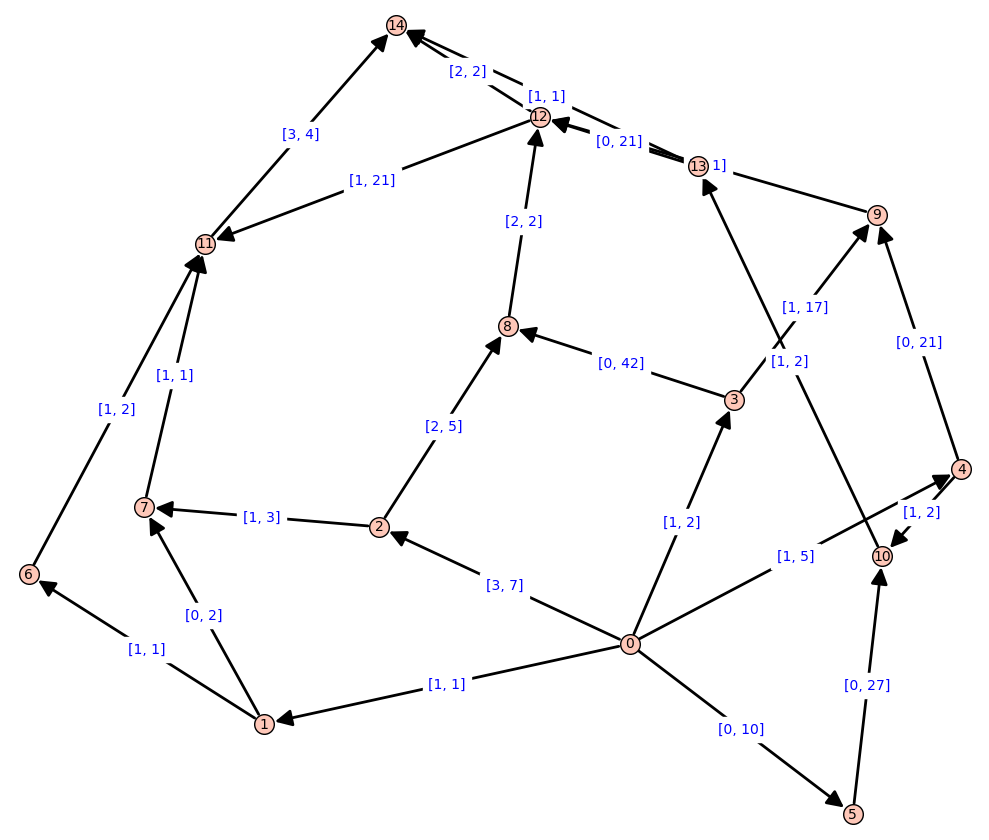

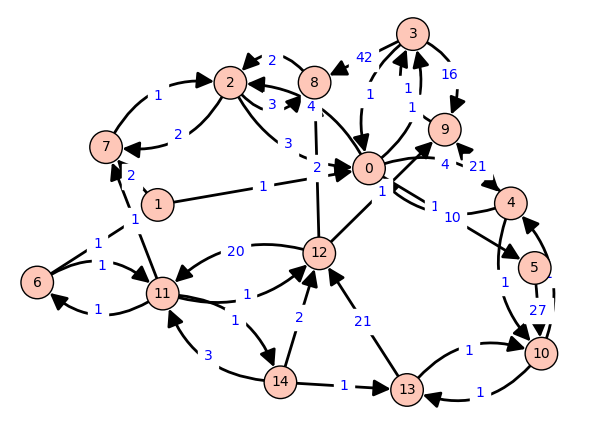

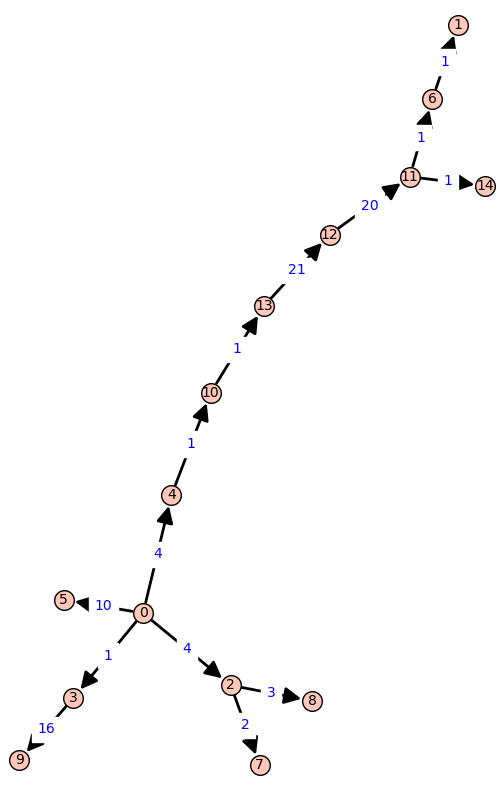

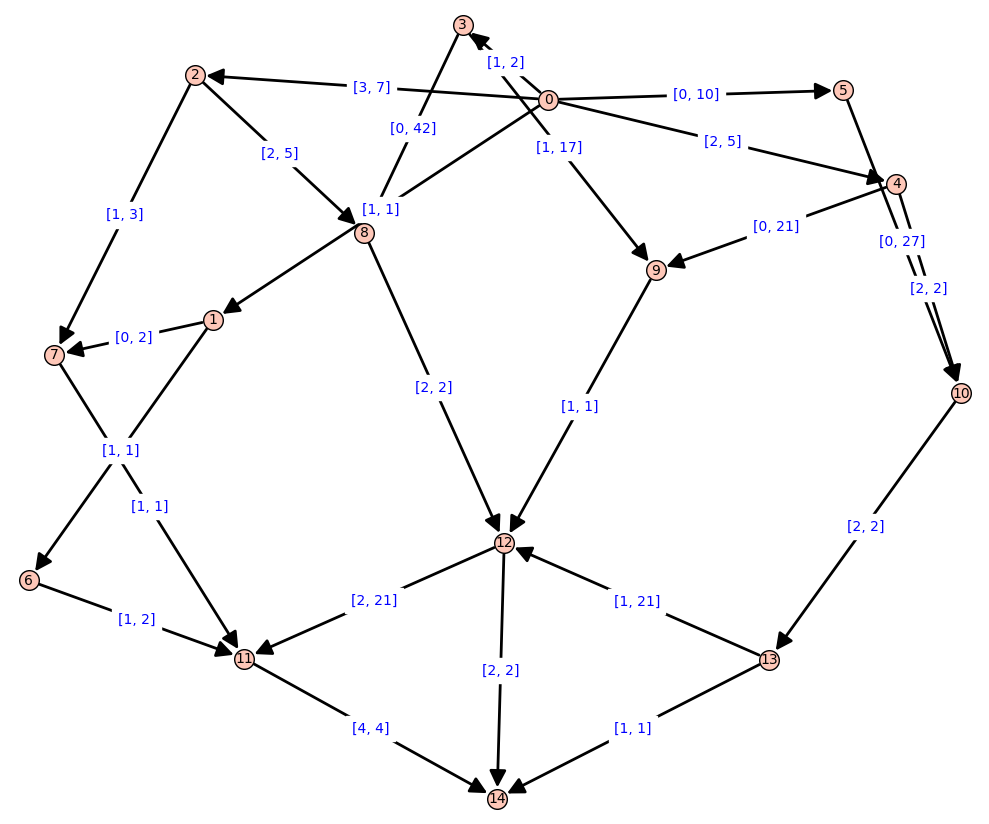

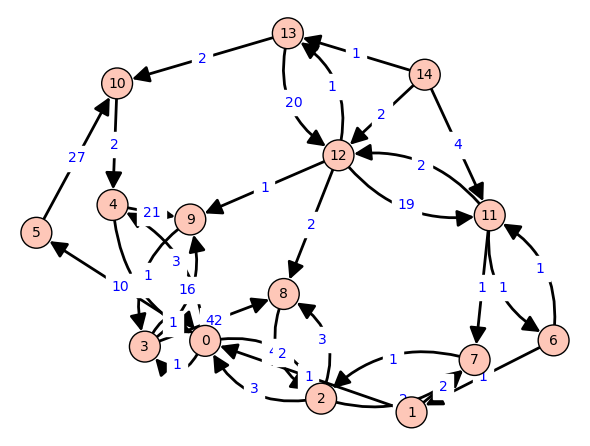

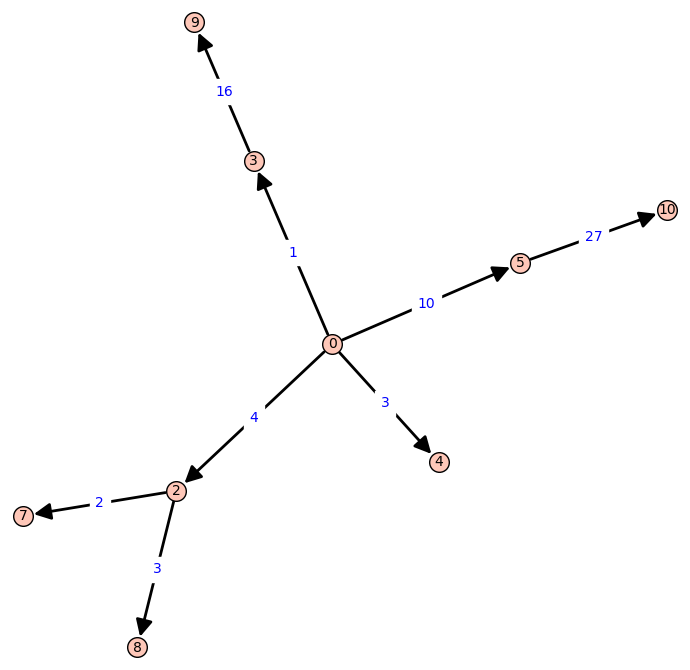

il n'existe aucun chemin de 0 a 14


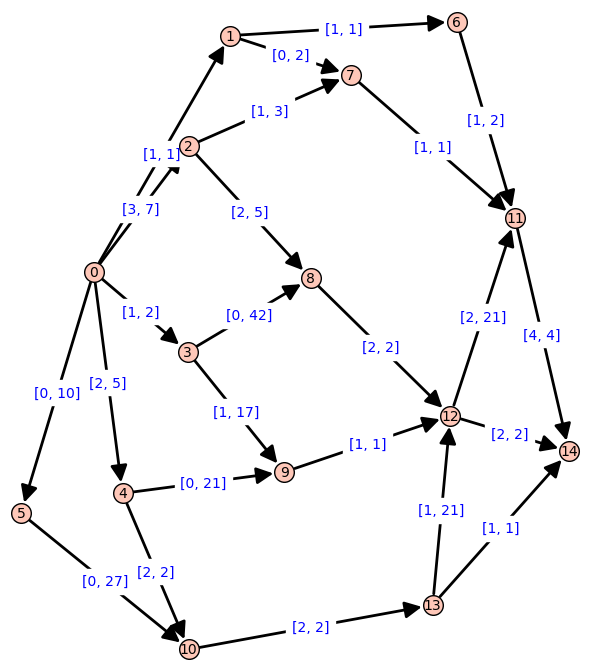

nombre iterations= 6
la valeur du flot est 7


([4, 1, 1, 21, 20, 1],
 {0: [[1, [1, 1]], [2, [3, 7]], [3, [1, 2]], [4, [2, 5]], [5, [0, 10]]],
  1: [[6, [1, 1]], [7, [0, 2]]],
  2: [[7, [1, 3]], [8, [2, 5]]],
  3: [[8, [0, 42]], [9, [1, 17]]],
  4: [[9, [0, 21]], [10, [2, 2]]],
  5: [[10, [0, 27]]],
  6: [[11, [1, 2]]],
  7: [[11, [1, 1]]],
  8: [[12, [2, 2]]],
  9: [[12, [1, 1]]],
  10: [[13, [2, 2]]],
  11: [[14, [4, 4]]],
  12: [[14, [2, 2]], [11, [2, 21]]],
  13: [[12, [1, 21]], [14, [1, 1]]],
  14: []},
 7)

In [576]:
Edmond_karp(D1,0,14)

In [496]:
def Edmond_karp1(D,s,t):
# Initialisation
    D_flot=initialiser_flot(D) 
    D_gf=graphe_residuel(D_flot)
    p=BFS(D_gf,s)[0]
    D_gf_bfs=BFS(D_gf,s)[1]
    L_chemin=[]
    chemin(D_gf_bfs,p,s,t,L_chemin)
    while(len(L_chemin)!=0):
        global L
        L=[]
# Calcul du flot minimum sur le chemin stocke dans la liste L_chemin
        for x in L_chemin:
            for v in D_gf_bfs[x[0]]: 
                if v[0]==x[1]:
                    L.append(v[1])
                if(len(L)!=0):
                    min_capacite=min(L)
# Amelioration de la valeur du flot        
        for x in L_chemin:
            for v in D_flot[x[0]]:
                if v[0]==x[1]:
                     v[1][0]=v[1][0]+min_capacite
# Recherche d'un chemin dans le graphe residuel du reseau de flot ameliore
        D_gf=graphe_residuel(D_flot)
        p=BFS(D_gf,s)[0]
        D_gf_bfs=BFS(D_gf,s)[1]
        L_chemin=[]
        chemin(D_gf_bfs,p,s,t,L_chemin)
# Valeur du flot max 
    flot_max=0
    for x in D_flot[s]:
        flot_max=flot_max+x[1][0]
    return (L,D_flot,flot_max)

In [497]:
exemple

{0: [[1, 100], [2, 100]], 1: [[2, 1], [3, 100]], 2: [[1, 1], [3, 100]], 3: []}

In [498]:
Edmond_karp1(exemple,0,3)

([100, 100],
 {0: [[1, [100, 100]], [2, [100, 100]]],
  1: [[2, [0, 1]], [3, [100, 100]]],
  2: [[1, [0, 1]], [3, [100, 100]]],
  3: []},
 200)

In [499]:
start_time = time.perf_counter()
Edmond_karp1(D,0,14)
end_time = time.perf_counter()
total_time = end_time - start_time
print(total_time)

0.0024376000510528684


# Application de l'algorithme pour des reseaux de flot aleatoire, et test de performance de l'algorithme

In [500]:
def random_graph(number_vertices,number_edges,min_capacite,max_capacite):
    D={}
    for x in range(number_vertices):
        D[x]=[]
    arrete=0
    while(arrete<number_edges):
        sommet_depart=random.randint(0, number_vertices-1)
        sommet_arrive=random.randint(0, number_vertices-1)
        if sommet_depart!=sommet_arrive:
            if [sommet_arrive] not in D[sommet_depart]:
                D[sommet_depart].append([sommet_arrive])
                arrete=arrete+1
    s=random.randint(0, number_vertices-1)
    t=random.randint(0, number_vertices-1)
    for x in D:
        for arrete in D[x]:
            if arrete[0]==s:
                D[x].remove(arrete)
    for arrete in D[t]:
        D[t].remove(arrete)
    for x in D:
        for arrete in D[x]:
            poids=random.randint(min_capacite,max_capacite)
            arrete.append(poids)
    return (D,s,t)

In [501]:
graphe=random_graph(50,300,1,100)

In [502]:
graphe

({0: [[31, 43],
   [18, 52],
   [48, 51],
   [9, 93],
   [41, 85],
   [46, 51],
   [42, 37],
   [20, 77]],
  1: [[45, 84], [13, 4], [42, 30], [39, 40], [10, 91], [38, 96], [47, 20]],
  2: [[43, 88], [10, 97], [30, 7], [11, 80], [47, 91], [49, 74], [18, 55]],
  3: [[4, 11], [0, 56], [12, 22], [26, 46], [19, 28], [44, 69]],
  4: [[0, 43], [47, 48], [18, 34], [37, 10]],
  5: [[45, 99], [12, 70], [20, 83], [18, 30]],
  6: [[3, 5], [15, 37], [28, 71], [26, 91], [38, 66]],
  7: [[2, 24],
   [46, 64],
   [37, 77],
   [6, 2],
   [33, 22],
   [29, 63],
   [22, 3],
   [17, 45],
   [31, 7],
   [13, 42],
   [45, 83]],
  8: [[11, 97],
   [3, 92],
   [7, 47],
   [43, 37],
   [13, 82],
   [15, 96],
   [46, 80],
   [26, 32]],
  9: [[11, 48], [20, 100], [12, 28], [48, 37], [14, 97], [32, 15], [34, 94]],
  10: [[11, 87], [26, 53], [33, 56], [39, 12], [0, 71], [20, 36], [13, 11]],
  11: [[36, 27], [46, 90], [32, 35], [42, 18], [24, 31], [31, 62]],
  12: [[4, 42], [13, 17], [17, 84], [36, 16]],
  13: [[4,

In [503]:
start_time = time.perf_counter()
Edmond_karp1(graphe[0],graphe[1],graphe[2])
end_time = time.perf_counter()
total_time = end_time - start_time
print(total_time)

0.02417230000719428


In [504]:
def temps_execution(nombre_graphe,nb_max_sommets,nb_max_arretes,min_flow,max_flow):
    L1=[]
    for x in range(nombre_graphe):
        nb_sommets = 0
        nb_arrete = 0
        nb_sommets = random.randint(0,nb_max_sommets)
        nb_arrete = random.randint(0,nb_max_arretes)
        graphe = random_graph(nb_sommets,nb_arrete,min_flow,max_flow)
        start_time = time.perf_counter()
        Edmond_karp1(graphe,1,10)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        L1.append([nb_sommets,nb_arrete,total_time])
        print(L1)
    return L1

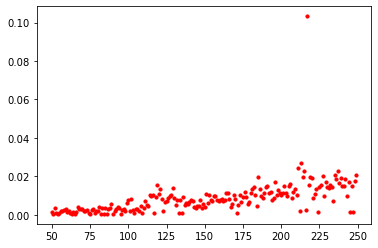

In [505]:
liste_test=[]
nb_sommet=20
for j in range(50,250):
        graphe=random_graph(nb_sommet,j,1,100)[0]
        s=random_graph(nb_sommet,j,1,100)[1]
        t=random_graph(nb_sommet,j,1,100)[2]
        start_time = time.perf_counter()
        Edmond_karp1(graphe,s,t)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        liste_test.append([i,j,total_time])
fig = plt.figure()
ax1 = fig.add_subplot(111)
sommets=[x[0] for x in liste_test]
arrete=[x[1] for x in liste_test]
temps_execution=[x[2] for x in liste_test]
ax1.scatter(arrete,temps_execution, s=10, c='r')
poly=[nb_sommet*x for x in arrete]
plt.show()

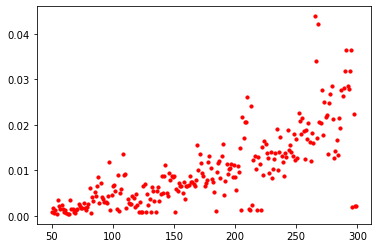

In [506]:
liste_test=[]
nb_sommet=20
for j in range(50,300):
        graphe=random_graph(nb_sommet,j,30,100)[0]
        s=random_graph(nb_sommet,j,30,100)[1]
        t=random_graph(nb_sommet,j,30,100)[2]
        start_time = time.perf_counter()
        Edmond_karp1(graphe,s,t)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        liste_test.append([i,j,total_time])
fig = plt.figure()
ax1 = fig.add_subplot(111)
sommets=[x[0] for x in liste_test]
arrete=[x[1] for x in liste_test]
temps_execution=[x[2] for x in liste_test]
ax1.scatter(arrete,temps_execution, s=10, c='r')
plt.show()

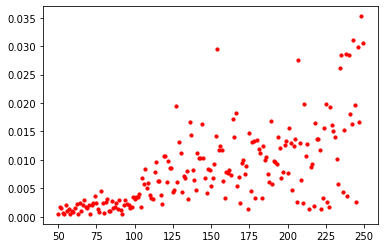

In [507]:
liste_test=[]
nb_sommet = 30
min_capacite = 30
max_capacite= 100
for j in range(50,250):
        graphe=random_graph(nb_sommet,j,min_capacite,max_capacite)[0]
        s=random_graph(nb_sommet,j,min_capacite,max_capacite)[1]
        t=random_graph(nb_sommet,j,min_capacite,max_capacite)[2]
        start_time = time.perf_counter()
        Edmond_karp1(graphe,s,t)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        liste_test.append([i,j,total_time])
fig = plt.figure()
ax1 = fig.add_subplot(111)
sommets=[x[0] for x in liste_test]
arrete=[x[1] for x in liste_test]
temps_execution=[x[2] for x in liste_test]
ax1.scatter(arrete,temps_execution, s=10, c='r')
plt.show()

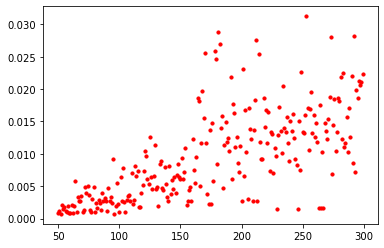

In [508]:
liste_test=[]
nb_sommet = 30
min_capacite = 5
max_capacite= 20
for j in range(50,300):
        graphe=random_graph(nb_sommet,j,min_capacite,max_capacite)[0]
        s=random_graph(nb_sommet,j,min_capacite,max_capacite)[1]
        t=random_graph(nb_sommet,j,min_capacite,max_capacite)[2]
        start_time = time.perf_counter()
        Edmond_karp1(graphe,s,t)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        liste_test.append([i,j,total_time])
fig = plt.figure()
ax1 = fig.add_subplot(111)
sommets=[x[0] for x in liste_test]
arrete=[x[1] for x in liste_test]
temps_execution=[x[2] for x in liste_test]
ax1.scatter(arrete,temps_execution, s=10, c='r')
plt.show()

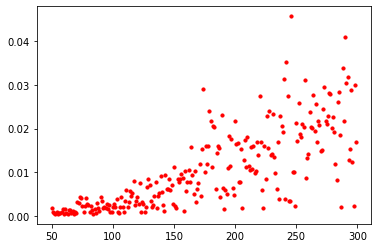

In [509]:
liste_test=[]
nb_sommet = 30
min_capacite = 10
max_capacite= 500
for j in range(50,300):
        graphe=random_graph(nb_sommet,j,min_capacite,max_capacite)[0]
        s=random_graph(nb_sommet,j,min_capacite,max_capacite)[1]
        t=random_graph(nb_sommet,j,min_capacite,max_capacite)[2]
        start_time = time.perf_counter()
        Edmond_karp1(graphe,s,t)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        liste_test.append([i,j,total_time])
fig = plt.figure()
ax1 = fig.add_subplot(111)
sommets=[x[0] for x in liste_test]
arrete=[x[1] for x in liste_test]
temps_execution=[x[2] for x in liste_test]
ax1.scatter(arrete,temps_execution, s=10, c='r')
plt.show()

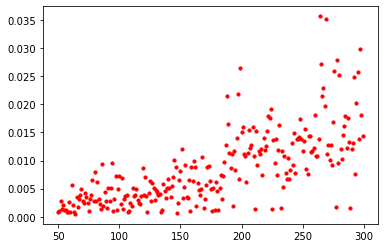

In [462]:
liste_test=[]
nb_sommet = 30
min_capacite = 1
max_capacite= 500
for j in range(50,300):
        graphe=random_graph(nb_sommet,j,min_capacite,max_capacite)[0]
        s=random_graph(nb_sommet,j,min_capacite,max_capacite)[1]
        t=random_graph(nb_sommet,j,min_capacite,max_capacite)[2]
        start_time = time.perf_counter()
        Edmond_karp1(graphe,s,t)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        liste_test.append([i,j,total_time])
fig = plt.figure()
ax1 = fig.add_subplot(111)
sommets=[x[0] for x in liste_test]
arrete=[x[1] for x in liste_test]
temps_execution=[x[2] for x in liste_test]
ax1.scatter(arrete,temps_execution, s=10, c='r')
plt.show()

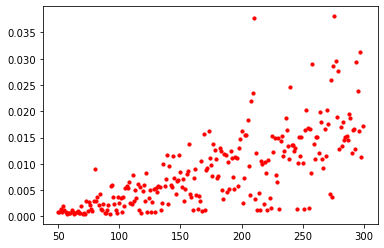

In [465]:
liste_test=[]
nb_sommet = 30
min_capacite = 1
max_capacite= 1000000000
for j in range(50,300):
        graphe=random_graph(nb_sommet,j,min_capacite,max_capacite)[0]
        s=random_graph(nb_sommet,j,min_capacite,max_capacite)[1]
        t=random_graph(nb_sommet,j,min_capacite,max_capacite)[2]
        start_time = time.perf_counter()
        Edmond_karp1(graphe,s,t)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        liste_test.append([i,j,total_time])
fig = plt.figure()
ax1 = fig.add_subplot(111)
sommets=[x[0] for x in liste_test]
arrete=[x[1] for x in liste_test]
temps_execution=[x[2] for x in liste_test]
ax1.scatter(arrete,temps_execution, s=10, c='r')
plt.show()

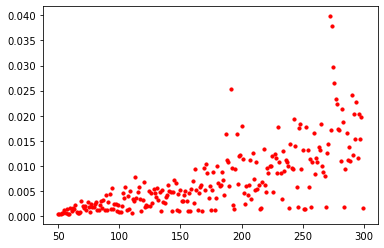

In [466]:
liste_test=[]
nb_sommet = 30
min_capacite = 400
max_capacite= 500
for j in range(50,300):
        graphe=random_graph(nb_sommet,j,min_capacite,max_capacite)[0]
        s=random_graph(nb_sommet,j,min_capacite,max_capacite)[1]
        t=random_graph(nb_sommet,j,min_capacite,max_capacite)[2]
        start_time = time.perf_counter()
        Edmond_karp1(graphe,s,t)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        liste_test.append([i,j,total_time])
fig = plt.figure()
ax1 = fig.add_subplot(111)
sommets=[x[0] for x in liste_test]
arrete=[x[1] for x in liste_test]
temps_execution=[x[2] for x in liste_test]
ax1.scatter(arrete,temps_execution, s=10, c='r')
plt.show()

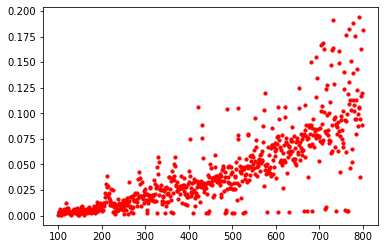

In [468]:
liste_test=[]
nb_sommet = 35
min_capacite = 400
max_capacite= 500
for j in range(100,800):
        graphe=random_graph(nb_sommet,j,min_capacite,max_capacite)[0]
        s=random_graph(nb_sommet,j,min_capacite,max_capacite)[1]
        t=random_graph(nb_sommet,j,min_capacite,max_capacite)[2]
        start_time = time.perf_counter()
        Edmond_karp1(graphe,s,t)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        liste_test.append([i,j,total_time])
fig = plt.figure()
ax1 = fig.add_subplot(111)
sommets=[x[0] for x in liste_test]
arrete=[x[1] for x in liste_test]
temps_execution=[x[2] for x in liste_test]
ax1.scatter(arrete,temps_execution, s=10, c='r')
plt.show()

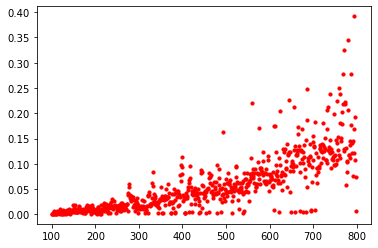

In [521]:
liste_test=[]
nb_sommet = 35
min_capacite = 1
max_capacite= 800
for j in range(100,800):
        graphe=random_graph(nb_sommet,j,min_capacite,max_capacite)[0]
        s=random_graph(nb_sommet,j,min_capacite,max_capacite)[1]
        t=random_graph(nb_sommet,j,min_capacite,max_capacite)[2]
        start_time = time.perf_counter()
        Edmond_karp1(graphe,s,t)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        liste_test.append([i,j,total_time])
fig = plt.figure()
ax1 = fig.add_subplot(111)
sommets=[x[0] for x in liste_test]
arrete=[x[1] for x in liste_test]
temps_execution=[x[2] for x in liste_test]
ax1.scatter(arrete,temps_execution, s=10, c='r')
plt.show()

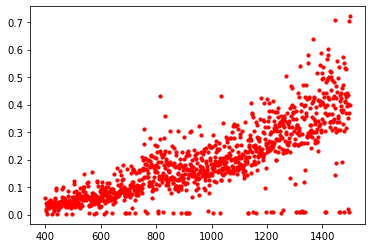

In [471]:
liste_test=[]
nb_sommet = 40
min_capacite = 1
max_capacite= 800
for j in range(400,1500):
        graphe=random_graph(nb_sommet,j,min_capacite,max_capacite)[0]
        s=random_graph(nb_sommet,j,min_capacite,max_capacite)[1]
        t=random_graph(nb_sommet,j,min_capacite,max_capacite)[2]
        start_time = time.perf_counter()
        Edmond_karp1(graphe,s,t)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        liste_test.append([i,j,total_time])
fig = plt.figure()
ax1 = fig.add_subplot(111)
sommets=[x[0] for x in liste_test]
arrete=[x[1] for x in liste_test]
temps_execution=[x[2] for x in liste_test]
ax1.scatter(arrete,temps_execution, s=10, c='r')
plt.show()

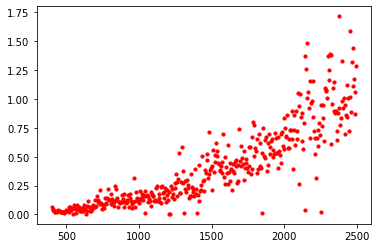

In [472]:
liste_test=[]
nb_sommet = 60
min_capacite = 1
max_capacite= 800
for j in range(400,2500,5):
        graphe=random_graph(nb_sommet,j,min_capacite,max_capacite)[0]
        s=random_graph(nb_sommet,j,min_capacite,max_capacite)[1]
        t=random_graph(nb_sommet,j,min_capacite,max_capacite)[2]
        start_time = time.perf_counter()
        Edmond_karp1(graphe,s,t)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        liste_test.append([i,j,total_time])
fig = plt.figure()
ax1 = fig.add_subplot(111)
sommets=[x[0] for x in liste_test]
arrete=[x[1] for x in liste_test]
temps_execution=[x[2] for x in liste_test]
ax1.scatter(arrete,temps_execution, s=10, c='r')
plt.show()

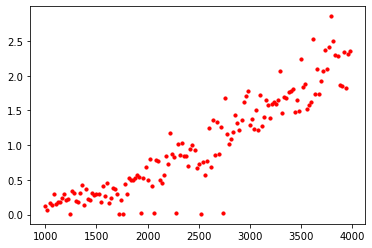

In [473]:
liste_test=[]
nb_sommet = 70
min_capacite = 1
max_capacite= 800
for j in range(1000,4000,20):
        graphe=random_graph(nb_sommet,j,min_capacite,max_capacite)[0]
        s=random_graph(nb_sommet,j,min_capacite,max_capacite)[1]
        t=random_graph(nb_sommet,j,min_capacite,max_capacite)[2]
        start_time = time.perf_counter()
        Edmond_karp1(graphe,s,t)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        liste_test.append([i,j,total_time])
fig = plt.figure()
ax1 = fig.add_subplot(111)
sommets=[x[0] for x in liste_test]
arrete=[x[1] for x in liste_test]
temps_execution=[x[2] for x in liste_test]
ax1.scatter(arrete,temps_execution, s=10, c='r')
plt.show()